TODO:
- Fill missing data
- Add classification feature columns
- Use torch Data object
- Add Dropout

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('train.csv')
print(len(raw))

1460


In [3]:
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

1073


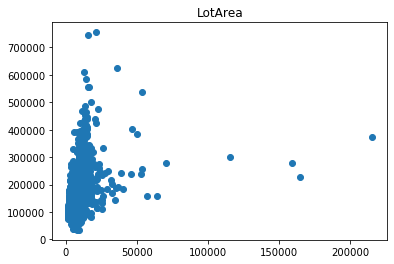

25


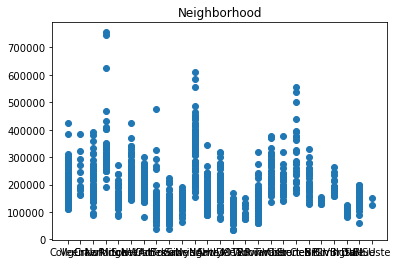

9


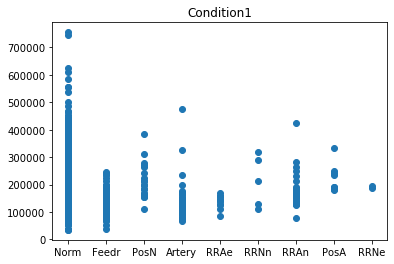

8


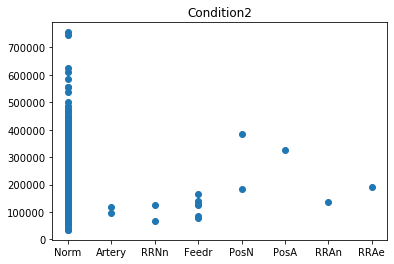

5


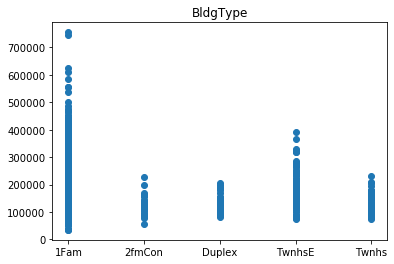

8


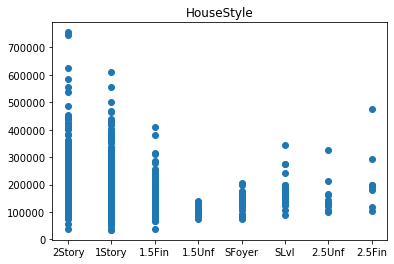

10


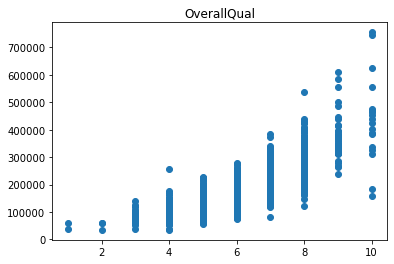

9


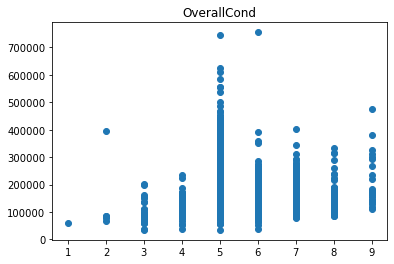

112


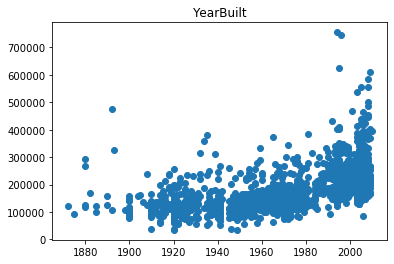

61


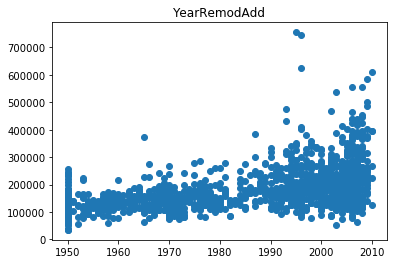

6


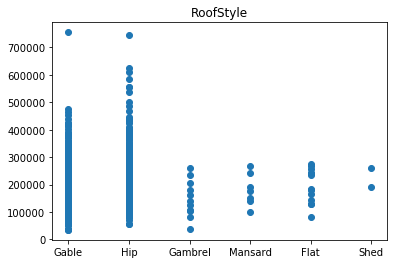

8


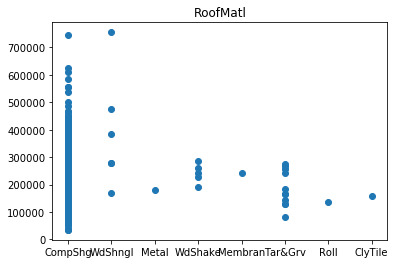

15


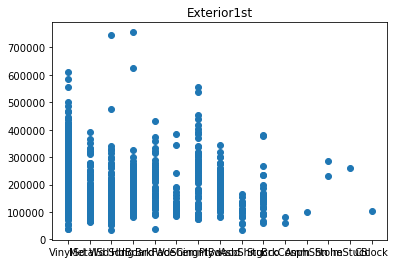

16


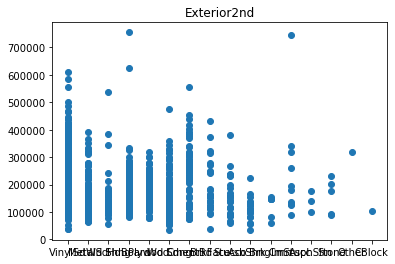

4


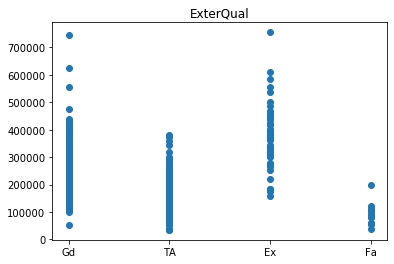

5


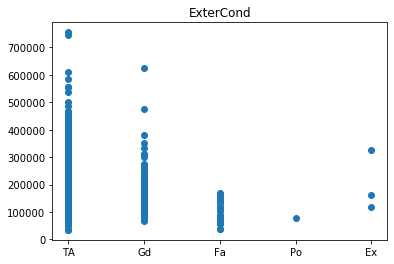

6


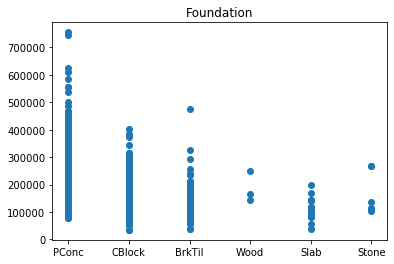

637


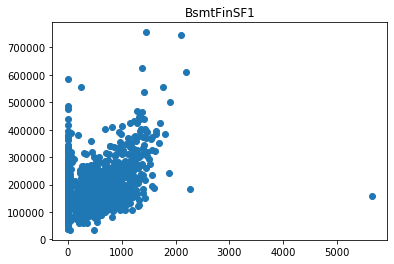

144


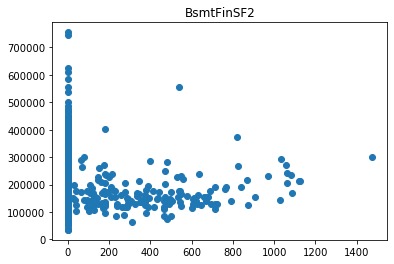

780


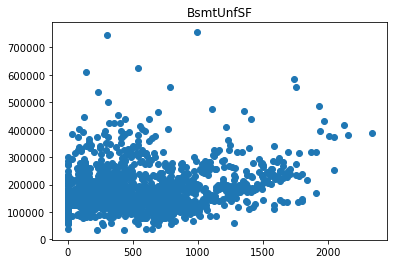

721


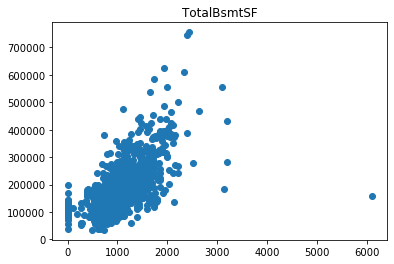

6


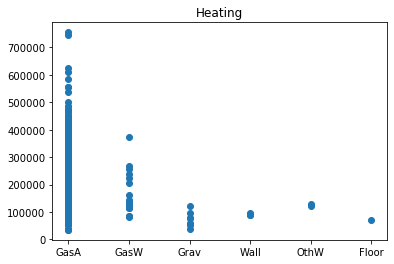

5


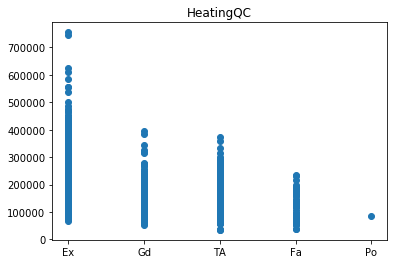

2


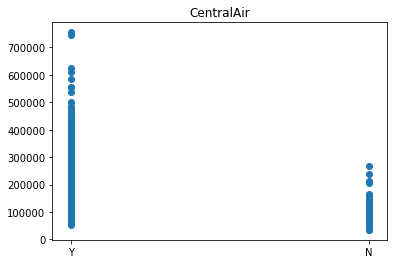

753


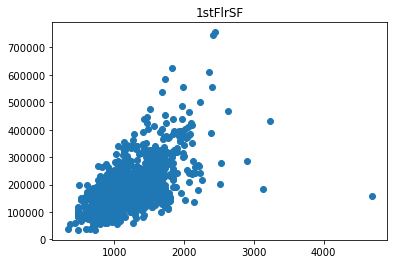

417


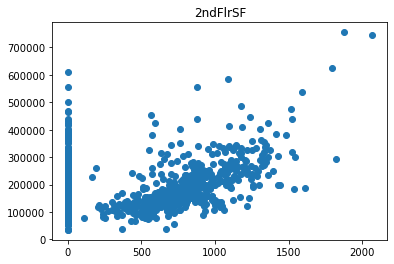

24


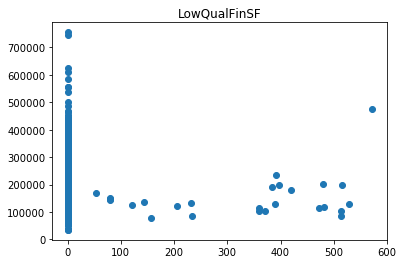

861


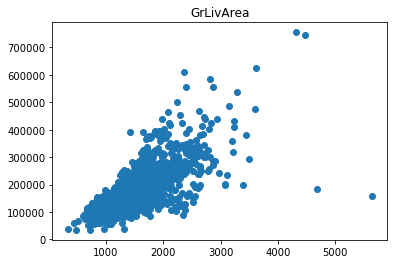

4


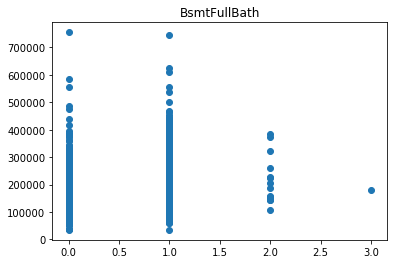

3


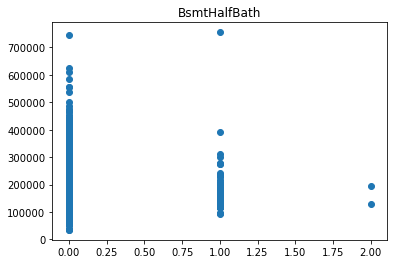

4


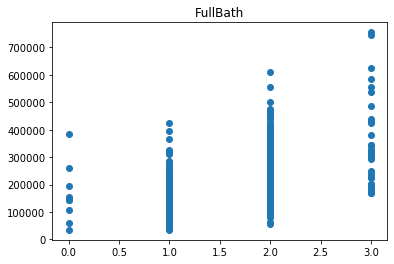

3


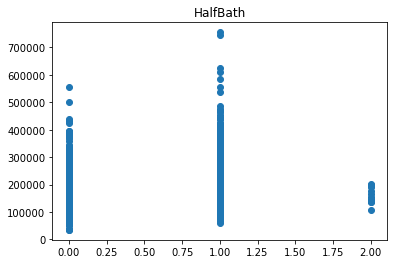

8


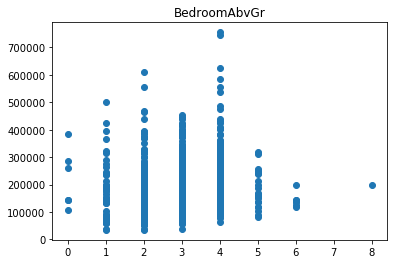

4


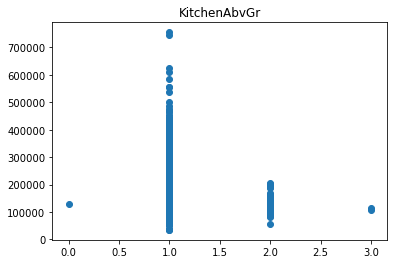

4


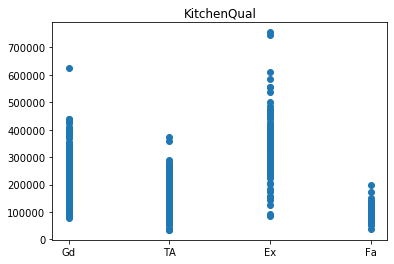

12


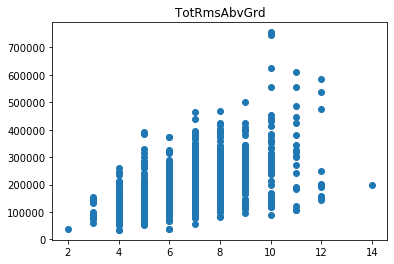

7


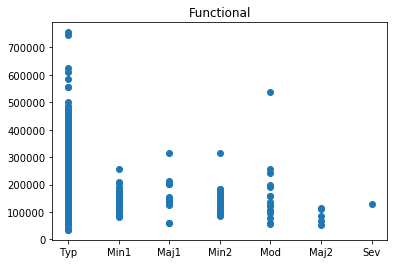

4


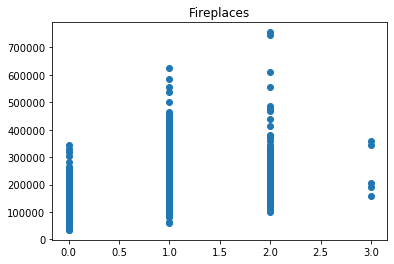

5


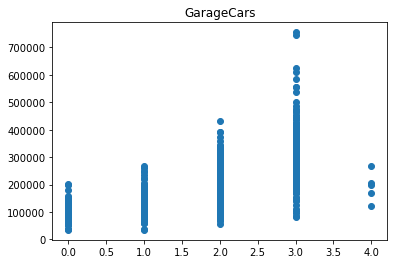

441


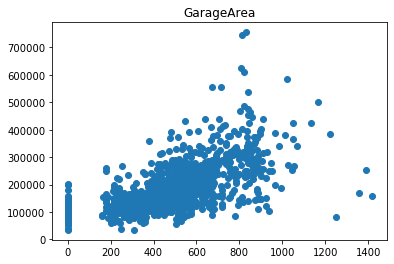

3


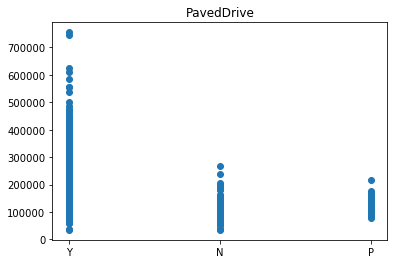

274


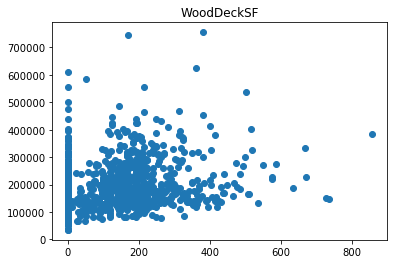

202


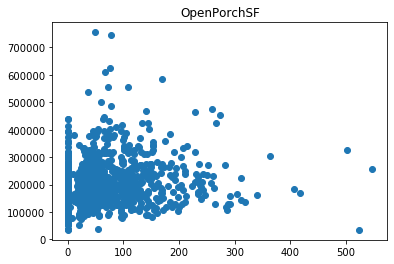

120


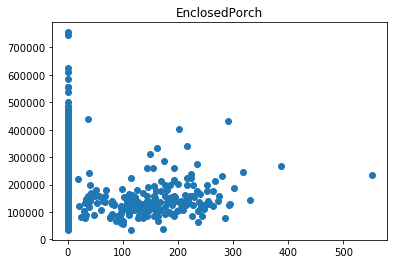

20


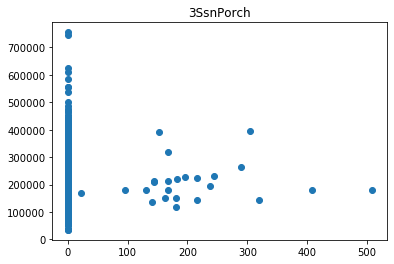

76


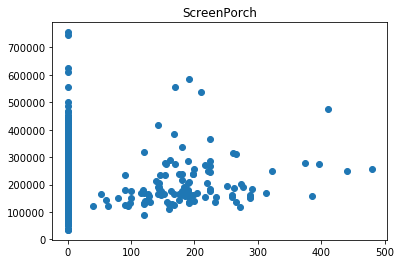

8


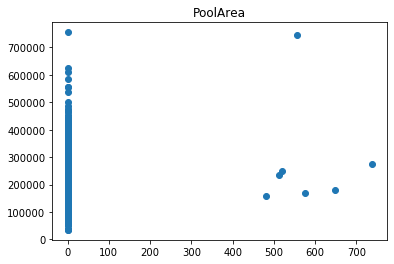

21


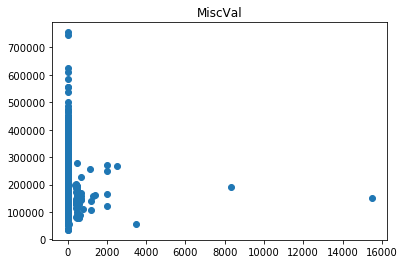

12


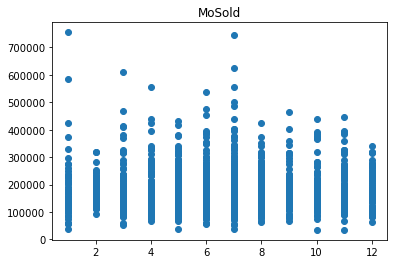

5


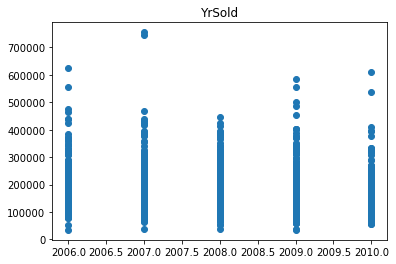

9


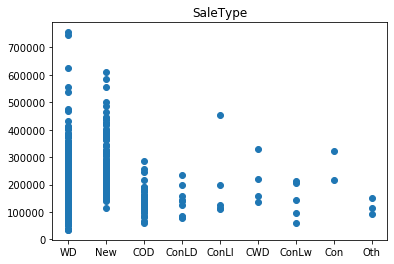

6


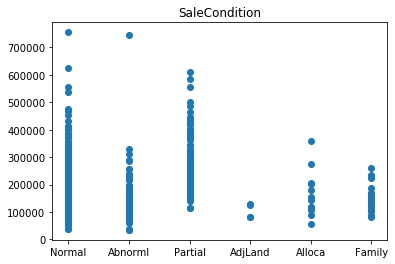

In [6]:
import matplotlib.pyplot as plt

ignore = ['Id','MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','SalePrice']

good_cols = []
feature_cols = []
for col in raw.columns:
    if not(raw[col].isnull().any()):
        good_cols += [col]
        if len(set(raw[col].values)) > 25 and col not in ignore:
            feature_cols += [col]

for col in good_cols:
    if col in ignore:
        continue
    try:
        print(len(set(raw[col].values)))
        plt.figure()
        plt.scatter(raw[col].values, raw['SalePrice'])
        plt.title(str(col))
        plt.show()
    except:
        print('Couldnt plot', col)

In [7]:
#feature_cols = ['1stFlrSF','2ndFlrSF','LotFrontage','LotArea','YearBuilt','YearRemodAdd']
#feature_cols = ['1stFlrSF','2ndFlrSF','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
#                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GrLivArea']
print(feature_cols)
feature_cols = list(set(feature_cols).intersection(set(good_cols)))
label_cols = ['SalePrice']

n_features = len(feature_cols)
n_labels = len(label_cols)

raw_features = raw.loc[:, ['Id']+label_cols+feature_cols]

['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [8]:
raw_features

,Id,SalePrice,BsmtFinSF1,BsmtFinSF2,GarageArea,OpenPorchSF,GrLivArea,YearRemodAdd,LotArea,EnclosedPorch,2ndFlrSF,ScreenPorch,WoodDeckSF,TotalBsmtSF,YearBuilt,BsmtUnfSF,1stFlrSF
0,1,208500,706,0,548,61,1710,2003,8450,0,854,0,0,856,2003,150,856
1,2,181500,978,0,460,0,1262,1976,9600,0,0,0,298,1262,1976,284,1262
2,3,223500,486,0,608,42,1786,2002,11250,0,866,0,0,920,2001,434,920
3,4,140000,216,0,642,35,1717,1970,9550,272,756,0,0,756,1915,540,961
4,5,250000,655,0,836,84,2198,2000,14260,0,1053,0,192,1145,2000,490,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,0,0,460,40,1647,2000,7917,0,694,0,0,953,1999,953,953
1456,1457,210000,790,163,500,0,2073,1988,13175,0,0,0,349,1542,1978,589,2073
1457,1458,266500,275,0,252,60,2340,2006,9042,0,1152,0,0,1152,1941,877,1188
1458,1459,142125,49,1029,240,0,1078,1996,9717,112,0,0,366,1078,1950,0,1078


In [9]:
import numpy as np
raw_features = raw_features.values
np.random.shuffle(raw_features)

### Train/Test Split

In [10]:
pct_test = 5
len_test = int(len(raw_features)*pct_test/100)

train_raw = raw_features[:-len_test]
test_raw = raw_features[-len_test:]

print(len(train_raw))
print(len(test_raw))

1387
73


### Normalize Data

In [11]:
train = train_raw.copy()
test = test_raw.copy()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train) # Only fit on train data. Don't want to fit on any test data

train = scaler.transform(train)
test = scaler.transform(test)

#scaler.inverse_transform(normalized) # Inverse the normalization

In [13]:
# Only keep normalization of columns in normalization index
norm_idx = [i for i in range(2,2+n_features)]
for i in range(train.shape[1]):
    if i not in norm_idx:
        train[:,i] = train_raw[:,i]
        test[:,i] = test_raw[:,i]

In [14]:
#np.save('train_data.npy', train)

# DataSet & DataLoader

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
from torch.utils.data import Dataset, DataLoader

class HouseData(Dataset):
    def __init__(self, data):
        self.x = torch.from_numpy(train[:,2:2+n_features]).type(torch.float32)
        self.y = torch.from_numpy(train[:,n_labels]).type(torch.float32)
        
        self.n_samples = len(train)
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [17]:
dataset = HouseData(train)
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [18]:
dataset[0]

(tensor([0.2364, 0.0000, 0.4654, 0.2011, 0.2393, 0.9333, 0.0351, 0.0000, 0.0000,
         0.0000, 0.1435, 0.2625, 0.9710, 0.1156, 0.2914]),
 tensor(220000.))

# Build Model

In [19]:
class Model(nn.Module):
    def __init__(self, n_features, n_out=1):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(n_features, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 64)
        self.out = nn.Linear(64, n_out)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        
        return x

In [20]:
model = Model(n_features=n_features, n_out=n_labels)

In [21]:
import torch.optim as optim

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

In [28]:
# X_train = torch.Tensor(train[:,2:2+n_features])
# y_train = torch.Tensor(train[:,n_labels])

X_val = torch.Tensor(test[:,2:2+n_features])
y_val = torch.Tensor(test[:,n_labels])

In [24]:
from tqdm.notebook import tqdm

BATCH_SIZE = 32
EPOCHS = 3000

losses = []

model.train()

for epoch in tqdm(range(EPOCHS)):
    for features, labels in dataloader:
        #X_batch = X_train[i:i+BATCH_SIZE].view(-1, n_features)
        #y_batch = y_train[i:i+BATCH_SIZE].view(-1, n_labels)
        
        model.zero_grad()
        
        outputs = model(features.view(-1, n_features))
        loss = loss_function(outputs, labels.view(-1, n_labels))
        loss.backward()
        optimizer.step()
        
    losses += [float(loss)]
    if epoch % 50 == 0:
        print(float(loss))

1627713536.0
690969344.0
120385032.0
87665544.0
98584184.0
486128128.0
79113536.0
216946288.0
250637296.0
297861504.0
138890176.0
238623888.0
111727664.0
85842400.0
299390656.0
136967440.0
342964864.0
72362976.0
560449984.0
153235568.0
273608064.0
68680736.0
33722588.0
118084456.0
81480152.0
73061792.0
119564928.0
100404600.0
8946462.0
76499496.0
86050616.0
65595132.0
30267034.0
109441160.0
358514208.0
71691296.0
37523948.0
36892752.0
14814332.0
46705456.0
42477164.0
25468162.0
21720378.0
77670768.0
43869380.0
100525344.0
20619700.0
7808103.5
14320844.0
27865062.0
79684544.0
16130068.0
113536632.0
20554434.0
32678356.0
100001568.0
40448300.0
13617210.0
72240264.0
27760742.0



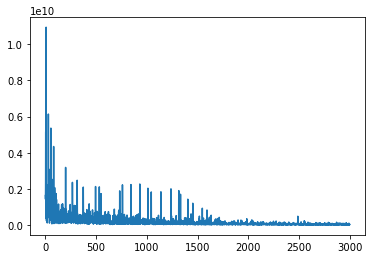

In [25]:
plt.figure()
plt.plot(losses)
plt.show()

In [29]:
model.eval()

with torch.no_grad():
    predictions = model(X_val.view(-1,n_features))
    print(predictions)

tensor([[108298.4922],
        [166590.8281],
        [202007.0312],
        [175666.5156],
        [259211.6875],
        [147969.6250],
        [348247.9375],
        [226400.6562],
        [153727.8125],
        [177268.7656],
        [ 64621.3398],
        [251968.6719],
        [206837.3281],
        [242804.9531],
        [150114.2031],
        [178746.6719],
        [233389.9688],
        [160686.1719],
        [220441.2031],
        [143673.8125],
        [130256.2734],
        [169508.9219],
        [237475.4062],
        [148460.5469],
        [152623.1406],
        [173713.5469],
        [354850.8438],
        [244567.5938],
        [220733.8125],
        [100836.4766],
        [173746.8594],
        [232552.7656],
        [156475.8438],
        [140609.4688],
        [154483.2969],
        [306392.9375],
        [152432.8594],
        [119952.6328],
        [153979.7031],
        [227783.8594],
        [317678.4062],
        [144912.5938],
        [498036.6562],
        [20

In [30]:
for x, y in zip(predictions, y_val):
    print('Prediction: {0:.0f}, Actual: {1:.0f}'.format(float(x), y))

Prediction: 108298, Actual: 153900
Prediction: 166591, Actual: 180000
Prediction: 202007, Actual: 203000
Prediction: 175667, Actual: 208900
Prediction: 259212, Actual: 290000
Prediction: 147970, Actual: 127500
Prediction: 348248, Actual: 315000
Prediction: 226401, Actual: 194000
Prediction: 153728, Actual: 158000
Prediction: 177269, Actual: 165000
Prediction: 64621, Actual: 126000
Prediction: 251969, Actual: 252678
Prediction: 206837, Actual: 213000
Prediction: 242805, Actual: 261500
Prediction: 150114, Actual: 151000
Prediction: 178747, Actual: 174000
Prediction: 233390, Actual: 213500
Prediction: 160686, Actual: 165000
Prediction: 220441, Actual: 253293
Prediction: 143674, Actual: 144500
Prediction: 130256, Actual: 146500
Prediction: 169509, Actual: 125000
Prediction: 237475, Actual: 328900
Prediction: 148461, Actual: 140000
Prediction: 152623, Actual: 155000
Prediction: 173714, Actual: 165000
Prediction: 354851, Actual: 426000
Prediction: 244568, Actual: 187500
Prediction: 220734, A